В данной лабораторной работе мы имеем дело с задачей **автострахования**.

*Получит ли клиент страховку на свой автомобиль или нет ?*
 

Библиотеки:


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

Чтение данных:


In [26]:
data = pd.read_csv("D:\Car_Insurance_Claim.csv")

Посмотрим на содержимое нашего набора данных:


In [27]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [28]:
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [29]:

print(f'Размер нашего набора данных: {data.shape}')


Размер нашего набора данных: (10000, 19)


Получим некоторые сведения о наших данных, а именно : заголовки, количество значений, тип данных столбцов 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Также стоит пояснить значение наших колонок ( признаков, на основании которых делаем предсказания ): 

ID - идентификатор водителя [число]

AGE - возраст клиента [26-39, 40-64, 16-25, 65+]

GENDER - пол клиента [female, male]

RACE - раса [majority(большинство), minority(меньшинство)]

DRIVING_EXPERIENCE - стаж вождения  [0-9y, 10-19y, 20-29y, 30y+]

EDUCATION - образование [high school, university, none]

INCOME - уровень дохода [upper class(высший), middle class(средний),
poverty(низший - бедность), working class(рабочий)]

CREDIT_SCORE - кредитный рейтинг - система оценки кредитоспособности (кредитных рисков) лица, основанная на численных статистических методах [число]

VEHICLE_OWNERSHIP - владение транспортным средством [1 - владеет, 0 - не владеет]

VEHICLE_YEAR - год выпуска транспортного средства [before 2015, after 2015]

MARRIED - семейное положение [1 - женат/замужем, 0 - не женат/не замужем]

CHILDREN - наличие детей [1 - есть, 0 - нет ]

POSTAL_CODE - почтовый индекс [число]

ANNUAL_MILEAGE - пробег автомобиля [число]

VEHICLE_TYPE - тип транспортного средства [sedan, sports car]

SPEEDING_VIOLATIONS - штрафы за превышение скорости [число 0 - 22]

DUIS - вождение в нетрезвом виде [число 0 - 6]

PAST_ACCIDENTS - аварии [число 0 - 15 ]

OUTCOME - результат выдачи страховки [1 - страховка выдана, 0 - страховка не выдана]

Количество уникальных элементов в каждой колонке:

In [31]:
data.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

Количество значений в каждой колонке:

In [32]:
for col in data.columns:
    print(f'Признак {col}:\n{data[col].value_counts()}\n')

Признак ID:
569520    1
702473    1
426507    1
386239    1
454670    1
         ..
931908    1
672440    1
297005    1
559584    1
442696    1
Name: ID, Length: 10000, dtype: int64

Признак AGE:
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

Признак GENDER:
female    5010
male      4990
Name: GENDER, dtype: int64

Признак RACE:
majority    9012
minority     988
Name: RACE, dtype: int64

Признак DRIVING_EXPERIENCE:
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

Признак EDUCATION:
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

Признак INCOME:
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

Признак CREDIT_SCORE:
0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9

Отделим числовые колонки и нечисловые для удобства:

In [33]:
num_columns = [c for c in data.columns if data[c].dtype =='int64' or data[c].dtype == 'float64']
print(f'Список числовых колонок:\n{num_columns}')

Список числовых колонок:
['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


In [34]:
cat_columns = [c for c in data.columns if data[c].dtype == 'object']
print(f'Список нечисловых колонок:\n{cat_columns}')

Список нечисловых колонок:
['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']


Заменим тип object на специальный тип, который предназаначен для хранения категорильных значений:

In [35]:
for x in cat_columns:
    data[x] = data[x].astype('category')

Посмотрим на данные после внесённых нами поправок:

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

Теперь визуализируем данные и вычислим основные характеристики. 

Для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.


In [37]:
data[num_columns].describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Для каждого категориального признака посчитаем кол - во уникальных значений, наиболее распространенное знечение и частоту самого распространенного значения.

In [38]:
data[cat_columns].describe(include=['category'])


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Перед обработкой данных посмотрим на конкретные признаки и визуализируем данные по ним. 

Построим несколько гистограмм, показывающих количество клиентов, которым одобрили страховку и тем, кто не смог её получить по некоторыми признакам.

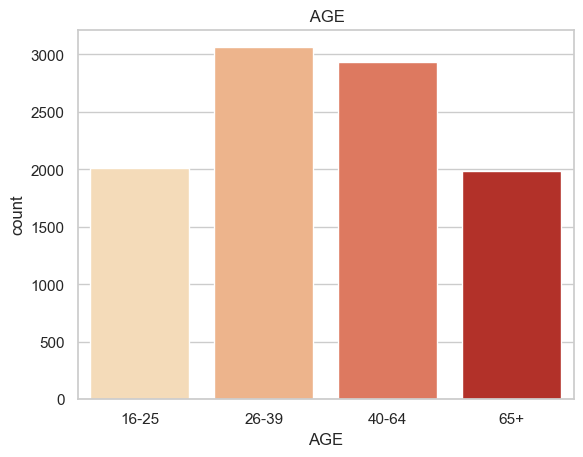

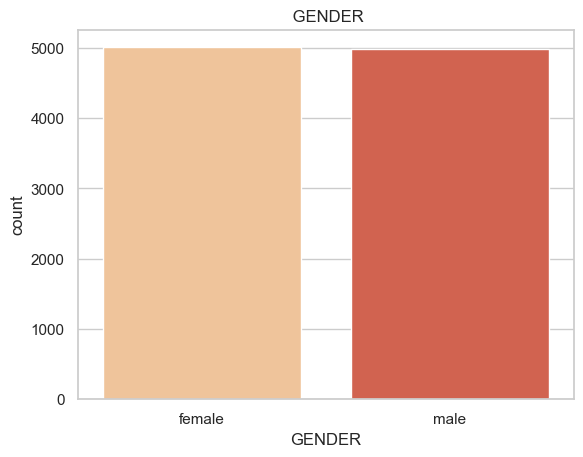

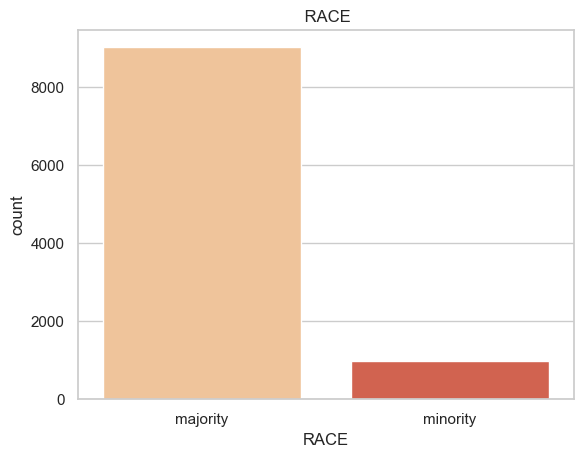

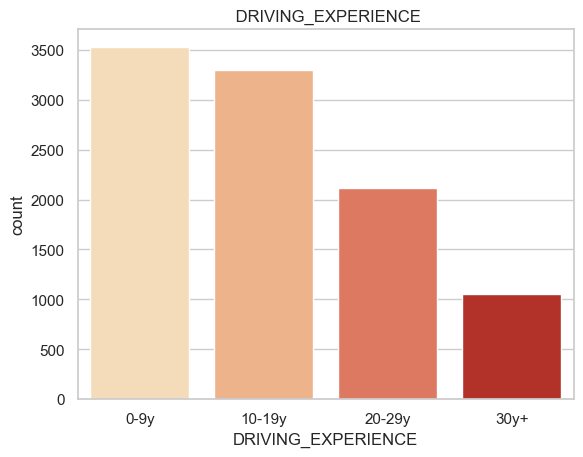

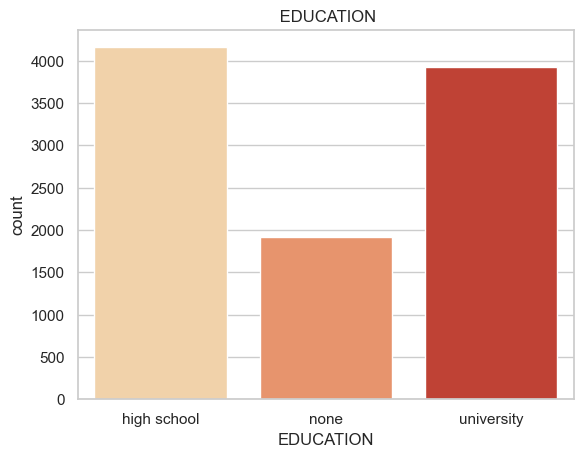

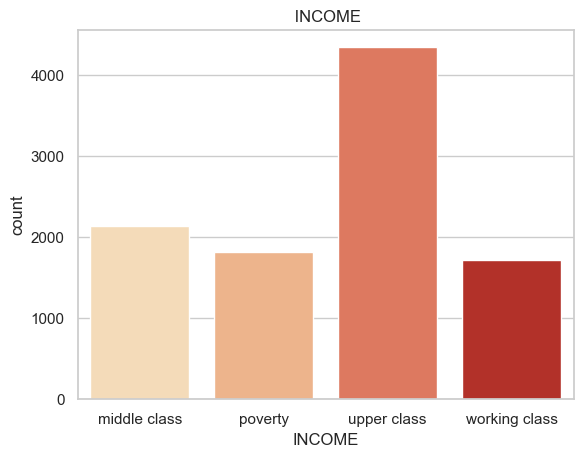

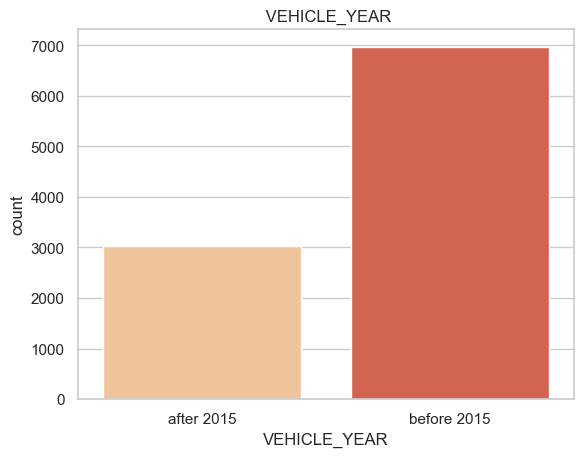

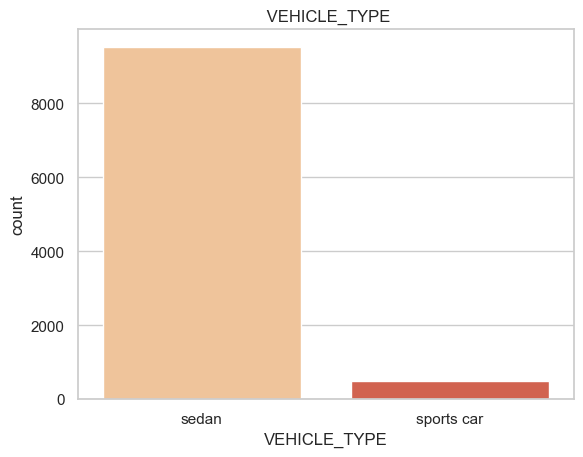

In [39]:
sns.set_theme(style = 'whitegrid')
for i in cat_columns: 
    sns.countplot(data = data, x = i, palette='OrRd')
    plt.title(f' {i}')
    plt.show()

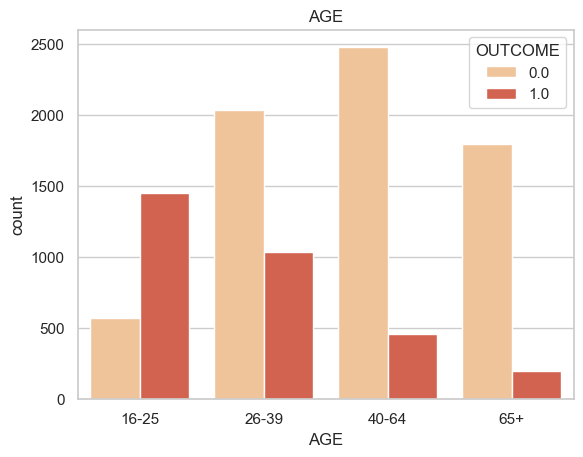

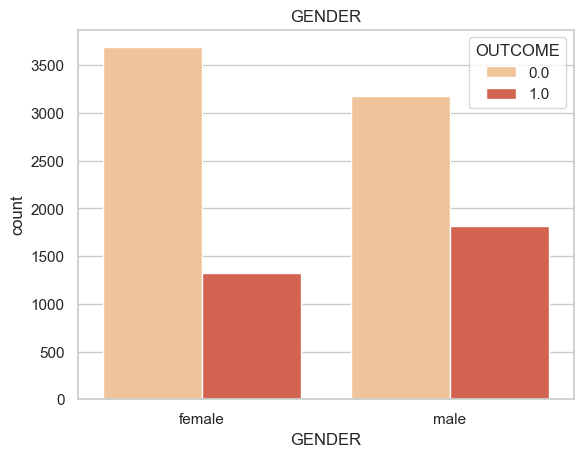

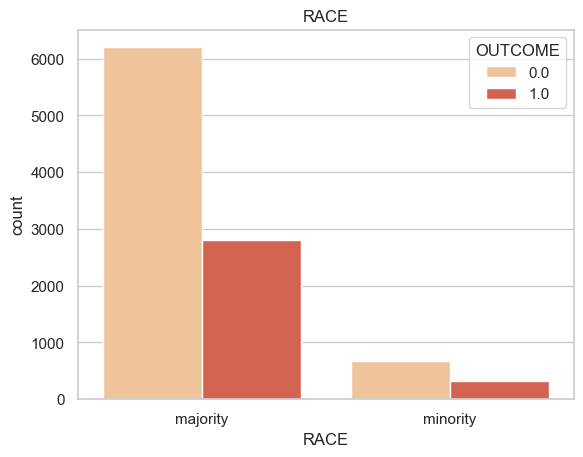

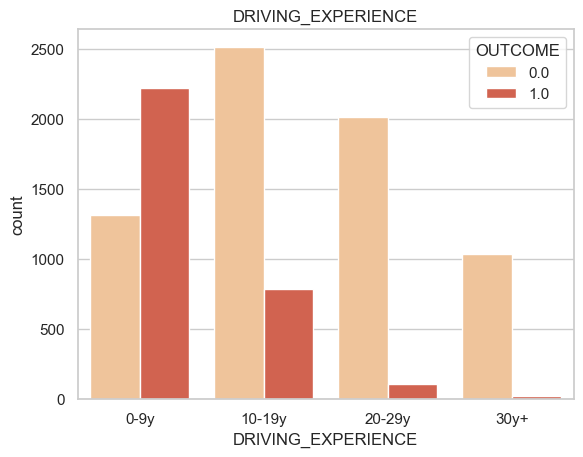

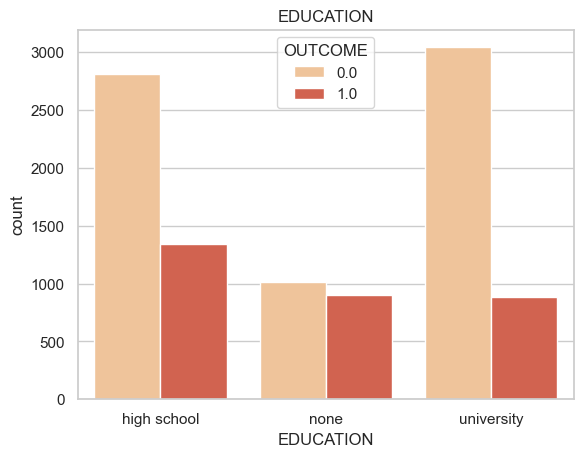

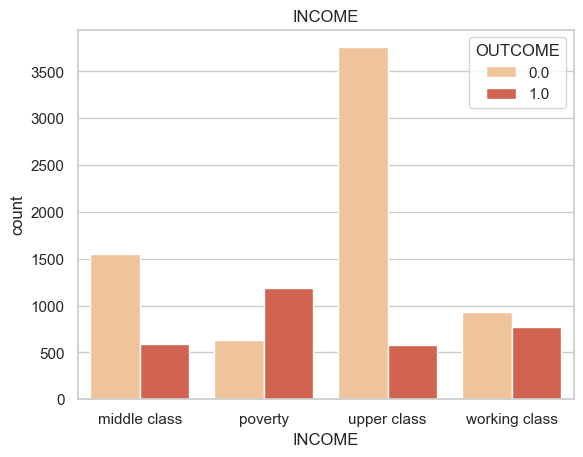

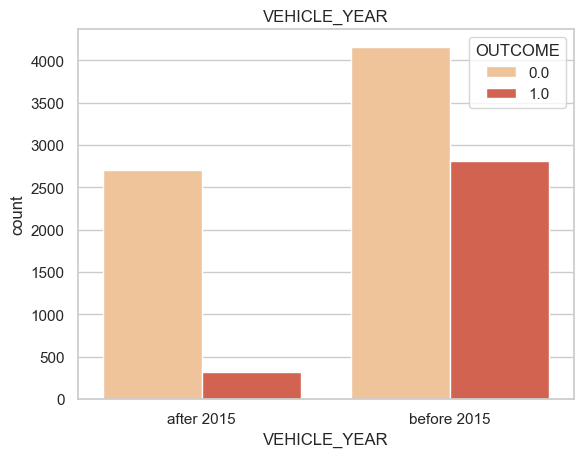

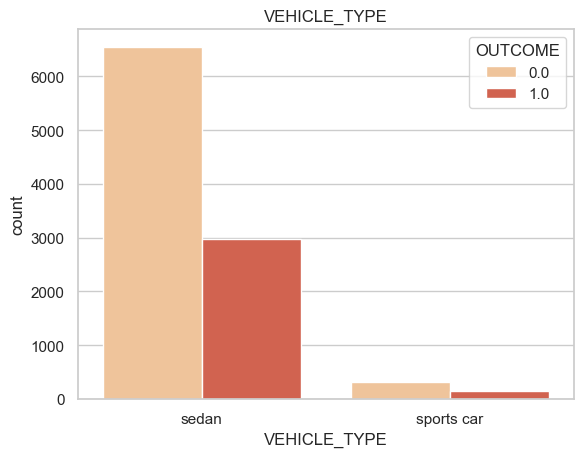

In [40]:
sns.set_theme(style = 'whitegrid')
for i in cat_columns: 
    sns.countplot(data = data, x = i, hue = 'OUTCOME', palette='OrRd')
    plt.title(f'{i}')
    plt.show()

Выводы из исходных графиков 

1) Возраст :  Наибольший процент клиентов, которым одобрили страховку - это люди в возрасте от 16 до 25 лет.

2) Пол :  В страховке приблизительно одинаково нуждались как мужчины так и женщины. Можно заметить, что ненамного, но чаще мужчинам одобряли страховку.

3) Стаж вождения :  Наибольшее кол-во клиентов, обратившихся за страховской имели стаж вождения 0 - 9 лет и 10 - 19 лет. Чаще всего страховку одобряли людям, которые имели стаж вождения от 0 до 9 лет.

4) Образование :  Большинство клиентов - люди со средним и высшим образованием . Из этих двух категорий чаще страховку одобряли людям со средним образованием.

5) Уровень дохода :  Большинство клиентов, нуждающиеся в страховке, имели высший уровень дохода. Однако зачастую одобряли страховку людям с низшим уровнем дохода.

6) Год выпуска транспортного средства :  Транспортные средства имеющие год выпуска ( после 2015 ) почти в два раза по количеству превышали транспортные средства года выпуска ( до 2015 ). Чаще всего страховку одобряли клиентам, имеющих транспорт года выпуска после 2015.

7) Тип транспортного средства :  Чаще всего у клиентов встречался транспорт типа sedan ( и страховку соответственно чаще всего получали клиенты с данным типом  транспортного средства ) 



In [41]:
columns_num_for = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'DUIS']

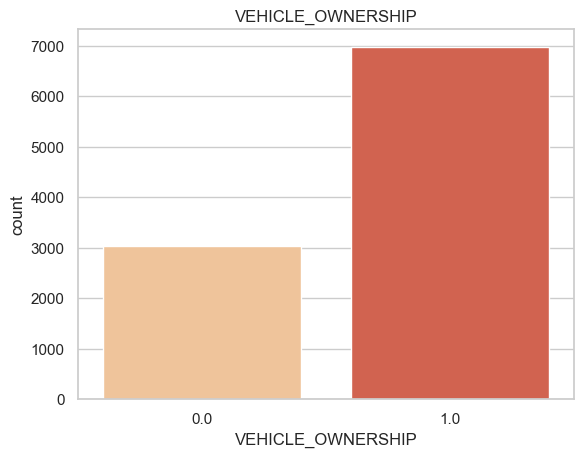

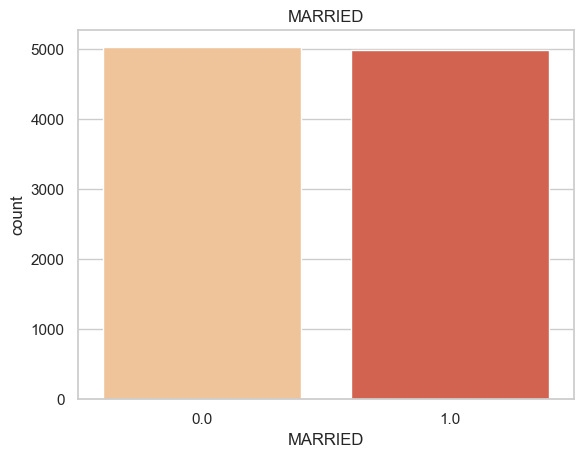

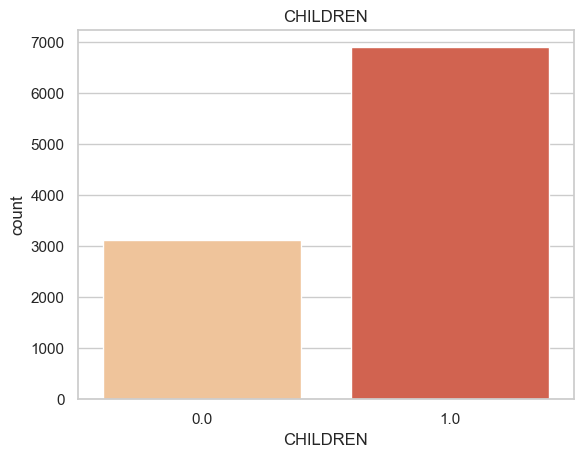

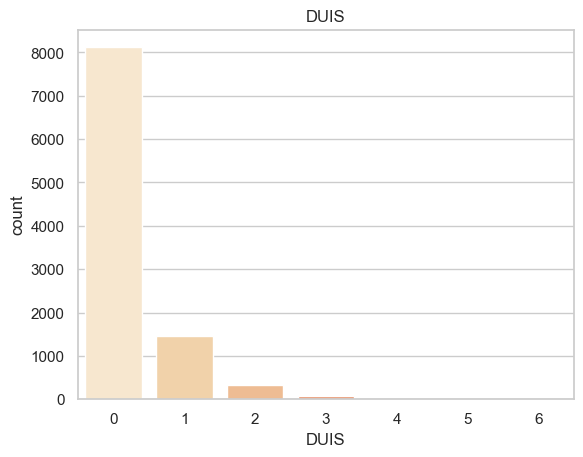

In [42]:
sns.set_theme(style = 'whitegrid')
for i in columns_num_for: 
    sns.countplot(data = data, x = i, palette='OrRd')
    plt.title(f'{i}')
    plt.show()

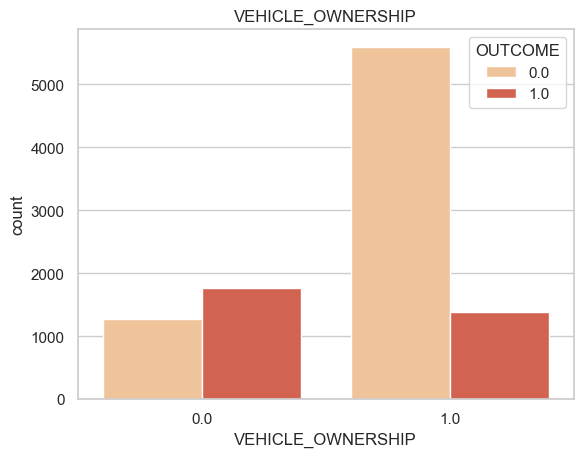

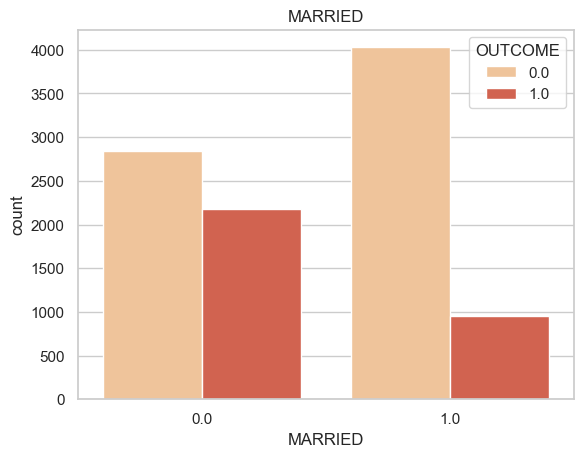

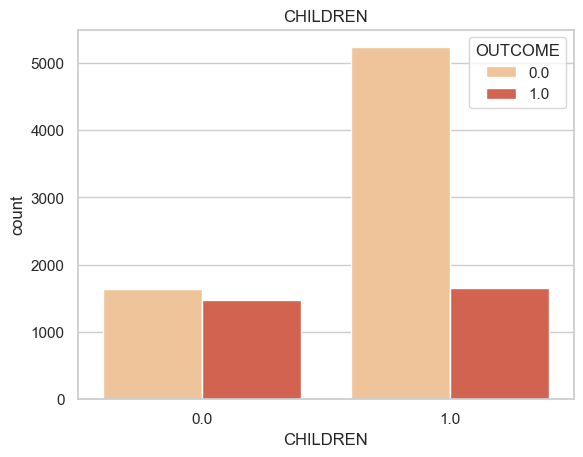

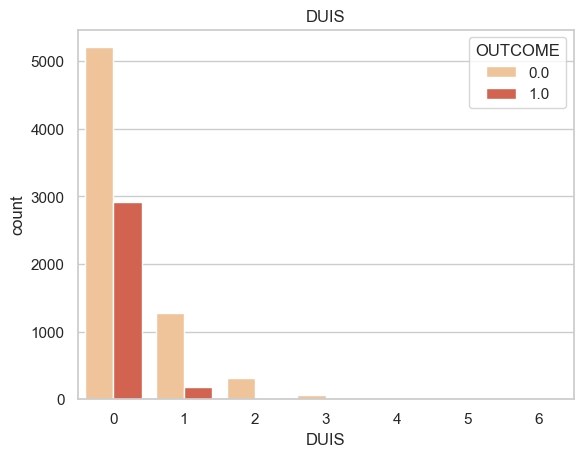

In [43]:
sns.set_theme(style = 'whitegrid')
for i in columns_num_for: 
    sns.countplot(data = data, x = i, hue = 'OUTCOME', palette='OrRd')
    plt.title(f'{i}')
    plt.show()

Выводы из анализа исходных графиков:

Владение транспортным средством : Кол - во клиентов, имеющих транспортное средство более чем в 2 раза превышает кол - во клиентов, не владеющих транспортным средством. Однако зачастую страховку одобряли людям, которые не владели транспортом.

Семейное положение : Клиентов состоящих в браке приблизительно такое же кол-во как и тех, кто в браке не состоит. Стоит заметить, что чаще всего страховку получали люди, не состоящие в браке.

Наличие детей :  Большинство клиентов имели детей.

Вождение в нетрезвом виде : Более 80% клиентов не имели штрафов за вождение в нетрезвом виде, чаще всего им и одобряли страховку.


Графики распределения числовых признаков

<Figure size 2000x1500 with 0 Axes>

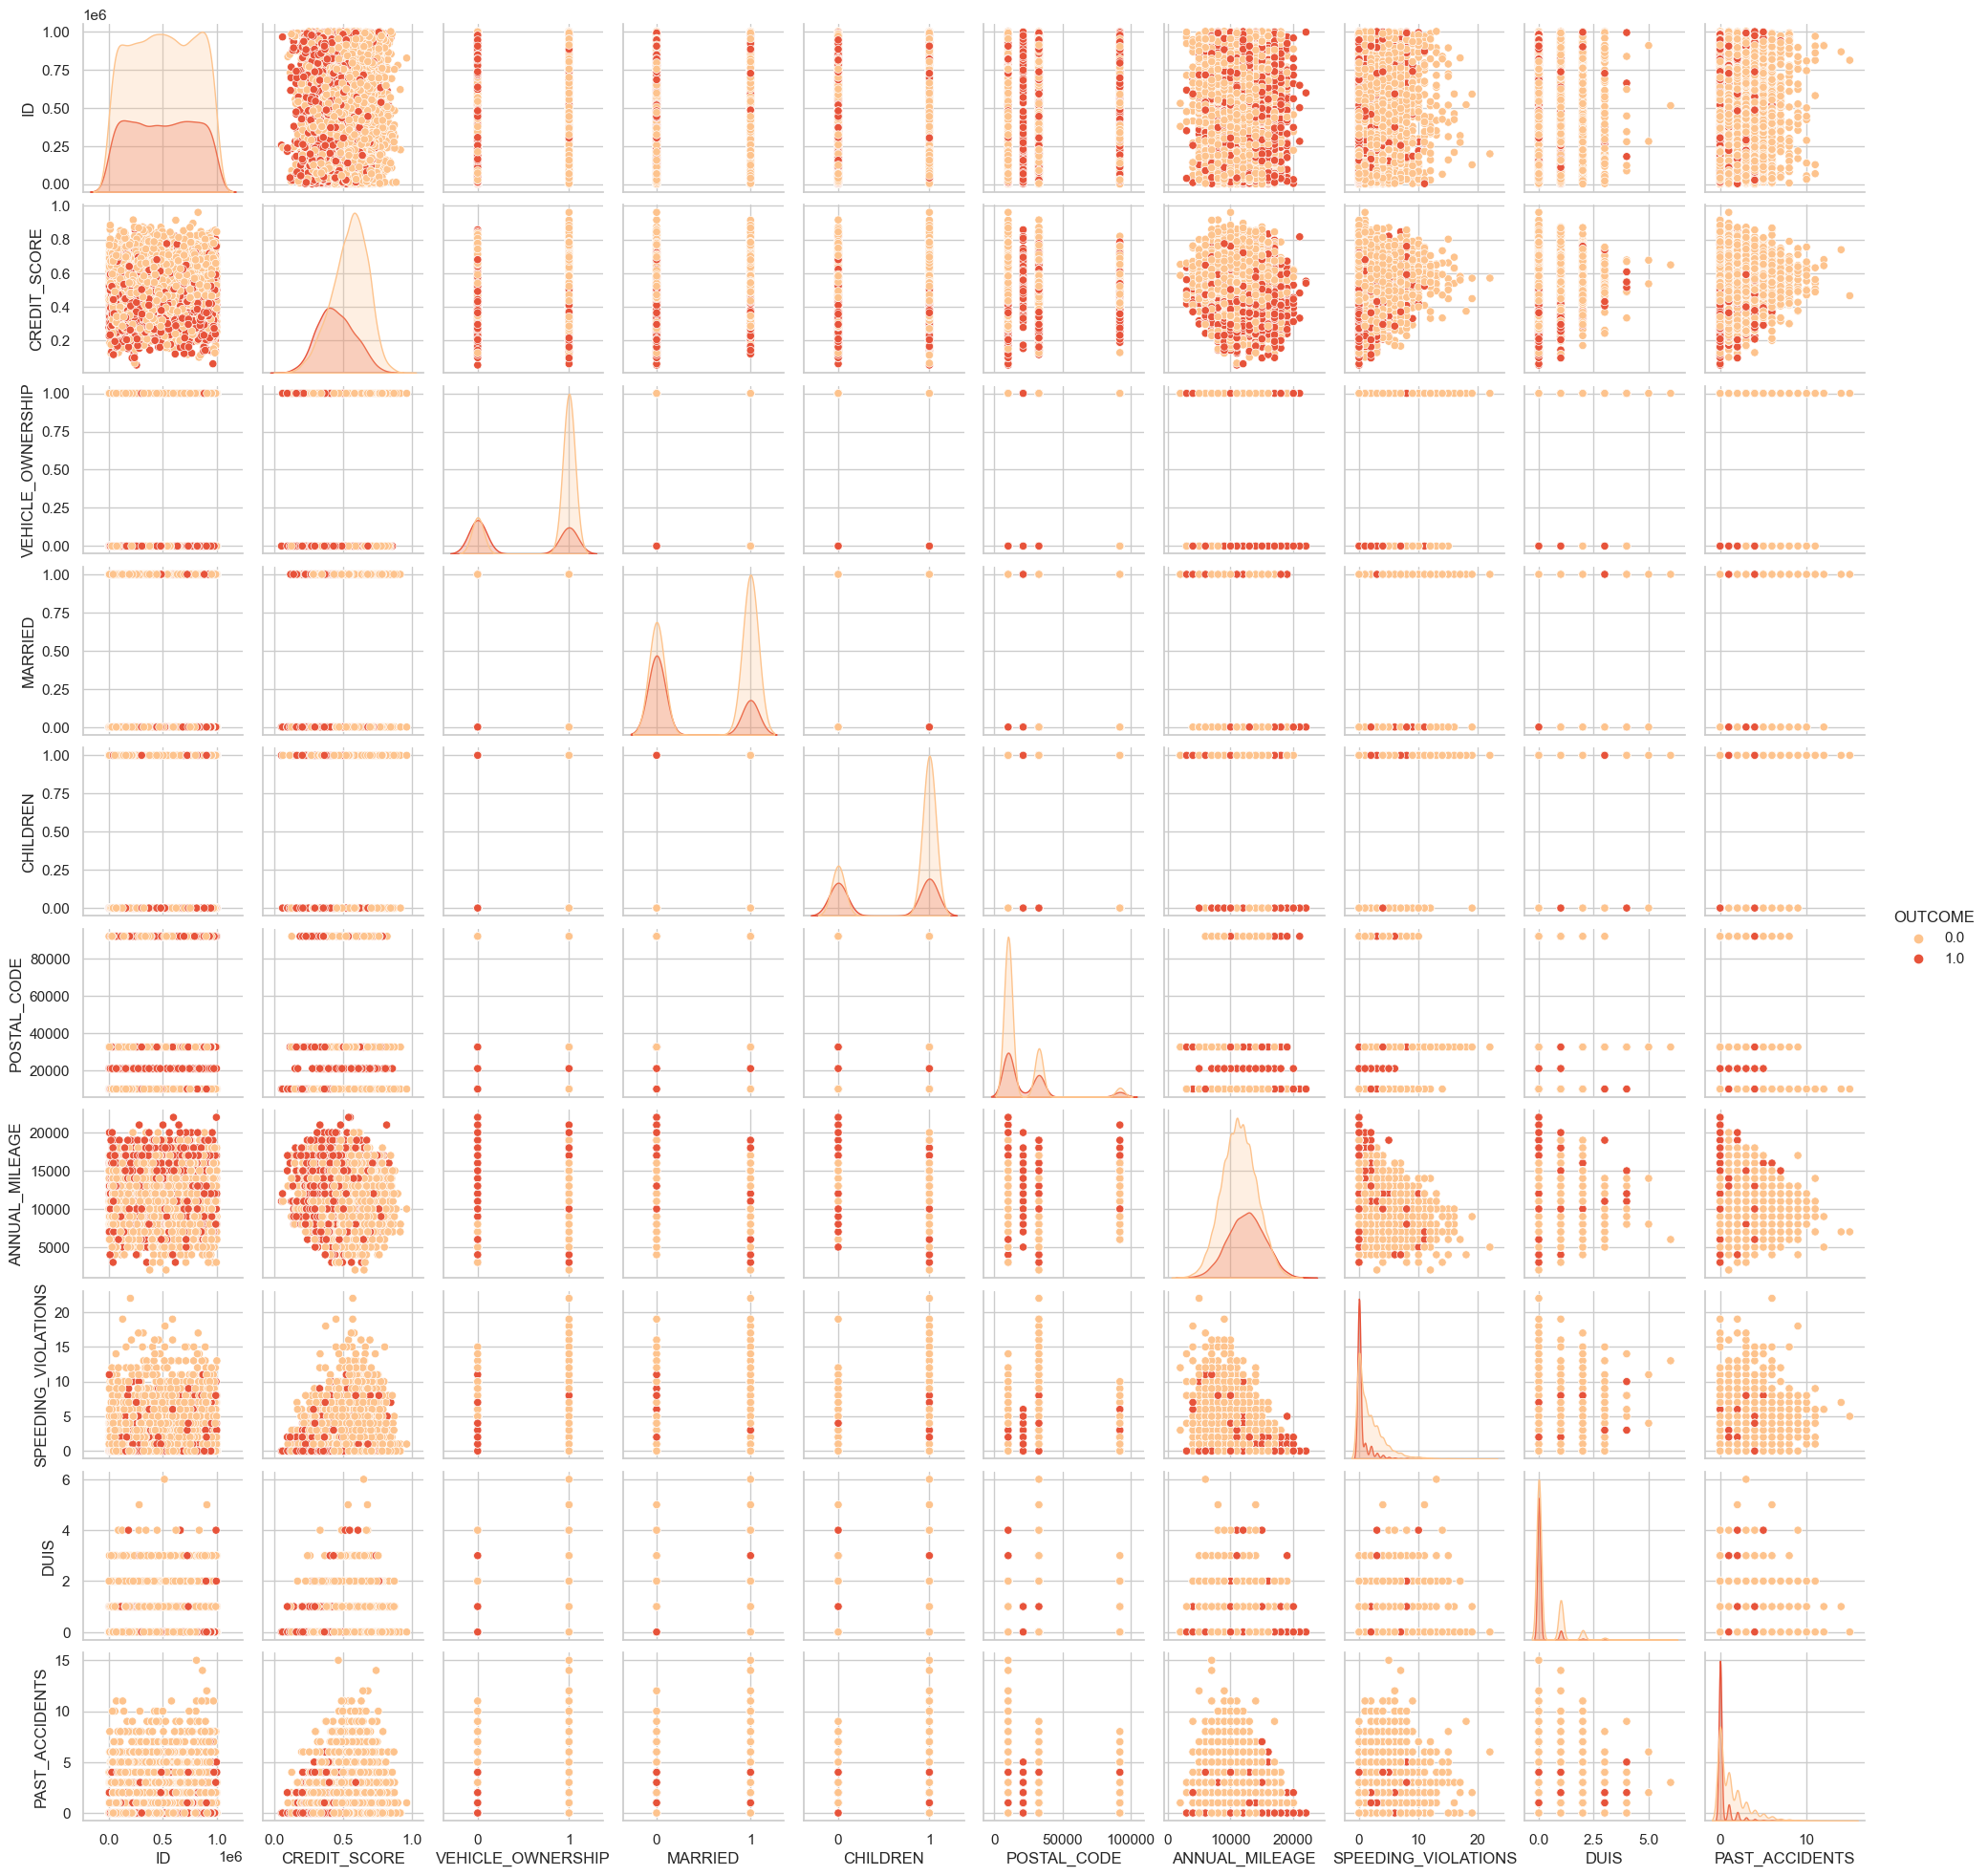

In [44]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='OUTCOME',height=2,palette='OrRd')
plt.show()

Займемся обработкой пропущенных значений.

Посмотрим количество пропущенных значений в нашем наборе данных:

In [45]:
data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Пропущенные значения присутствуют в столбце CREDIT_SCORE и ANNUAL_MILEAGE. Заполним их медианой и посмотрим на кол-во пропущенных значений в данных после наших действий.

In [46]:
data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].median(), inplace = True)


In [47]:
data['ANNUAL_MILEAGE'].fillna(data['ANNUAL_MILEAGE'].median(), inplace = True)

In [48]:
data.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пропущенные значения отсутствуют.

Удалим дубликаты в данных.


In [49]:
columns_list = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
data = data.drop_duplicates(subset=columns_list)
print(data.shape)


(9981, 19)


Приступим к обработке категориальных признаков.

Находим категориальные признаки и используем LabelEncoder (обычная нумерация значений) для перевода в численные значения.

In [50]:

data_final = data.copy()
encoder = LabelEncoder()

for x in cat_columns:
    data_final[x] = encoder.fit_transform(data_final[x])

Все категориальные признаки стали числовыми, мы можем построить корреляционную матрицу.


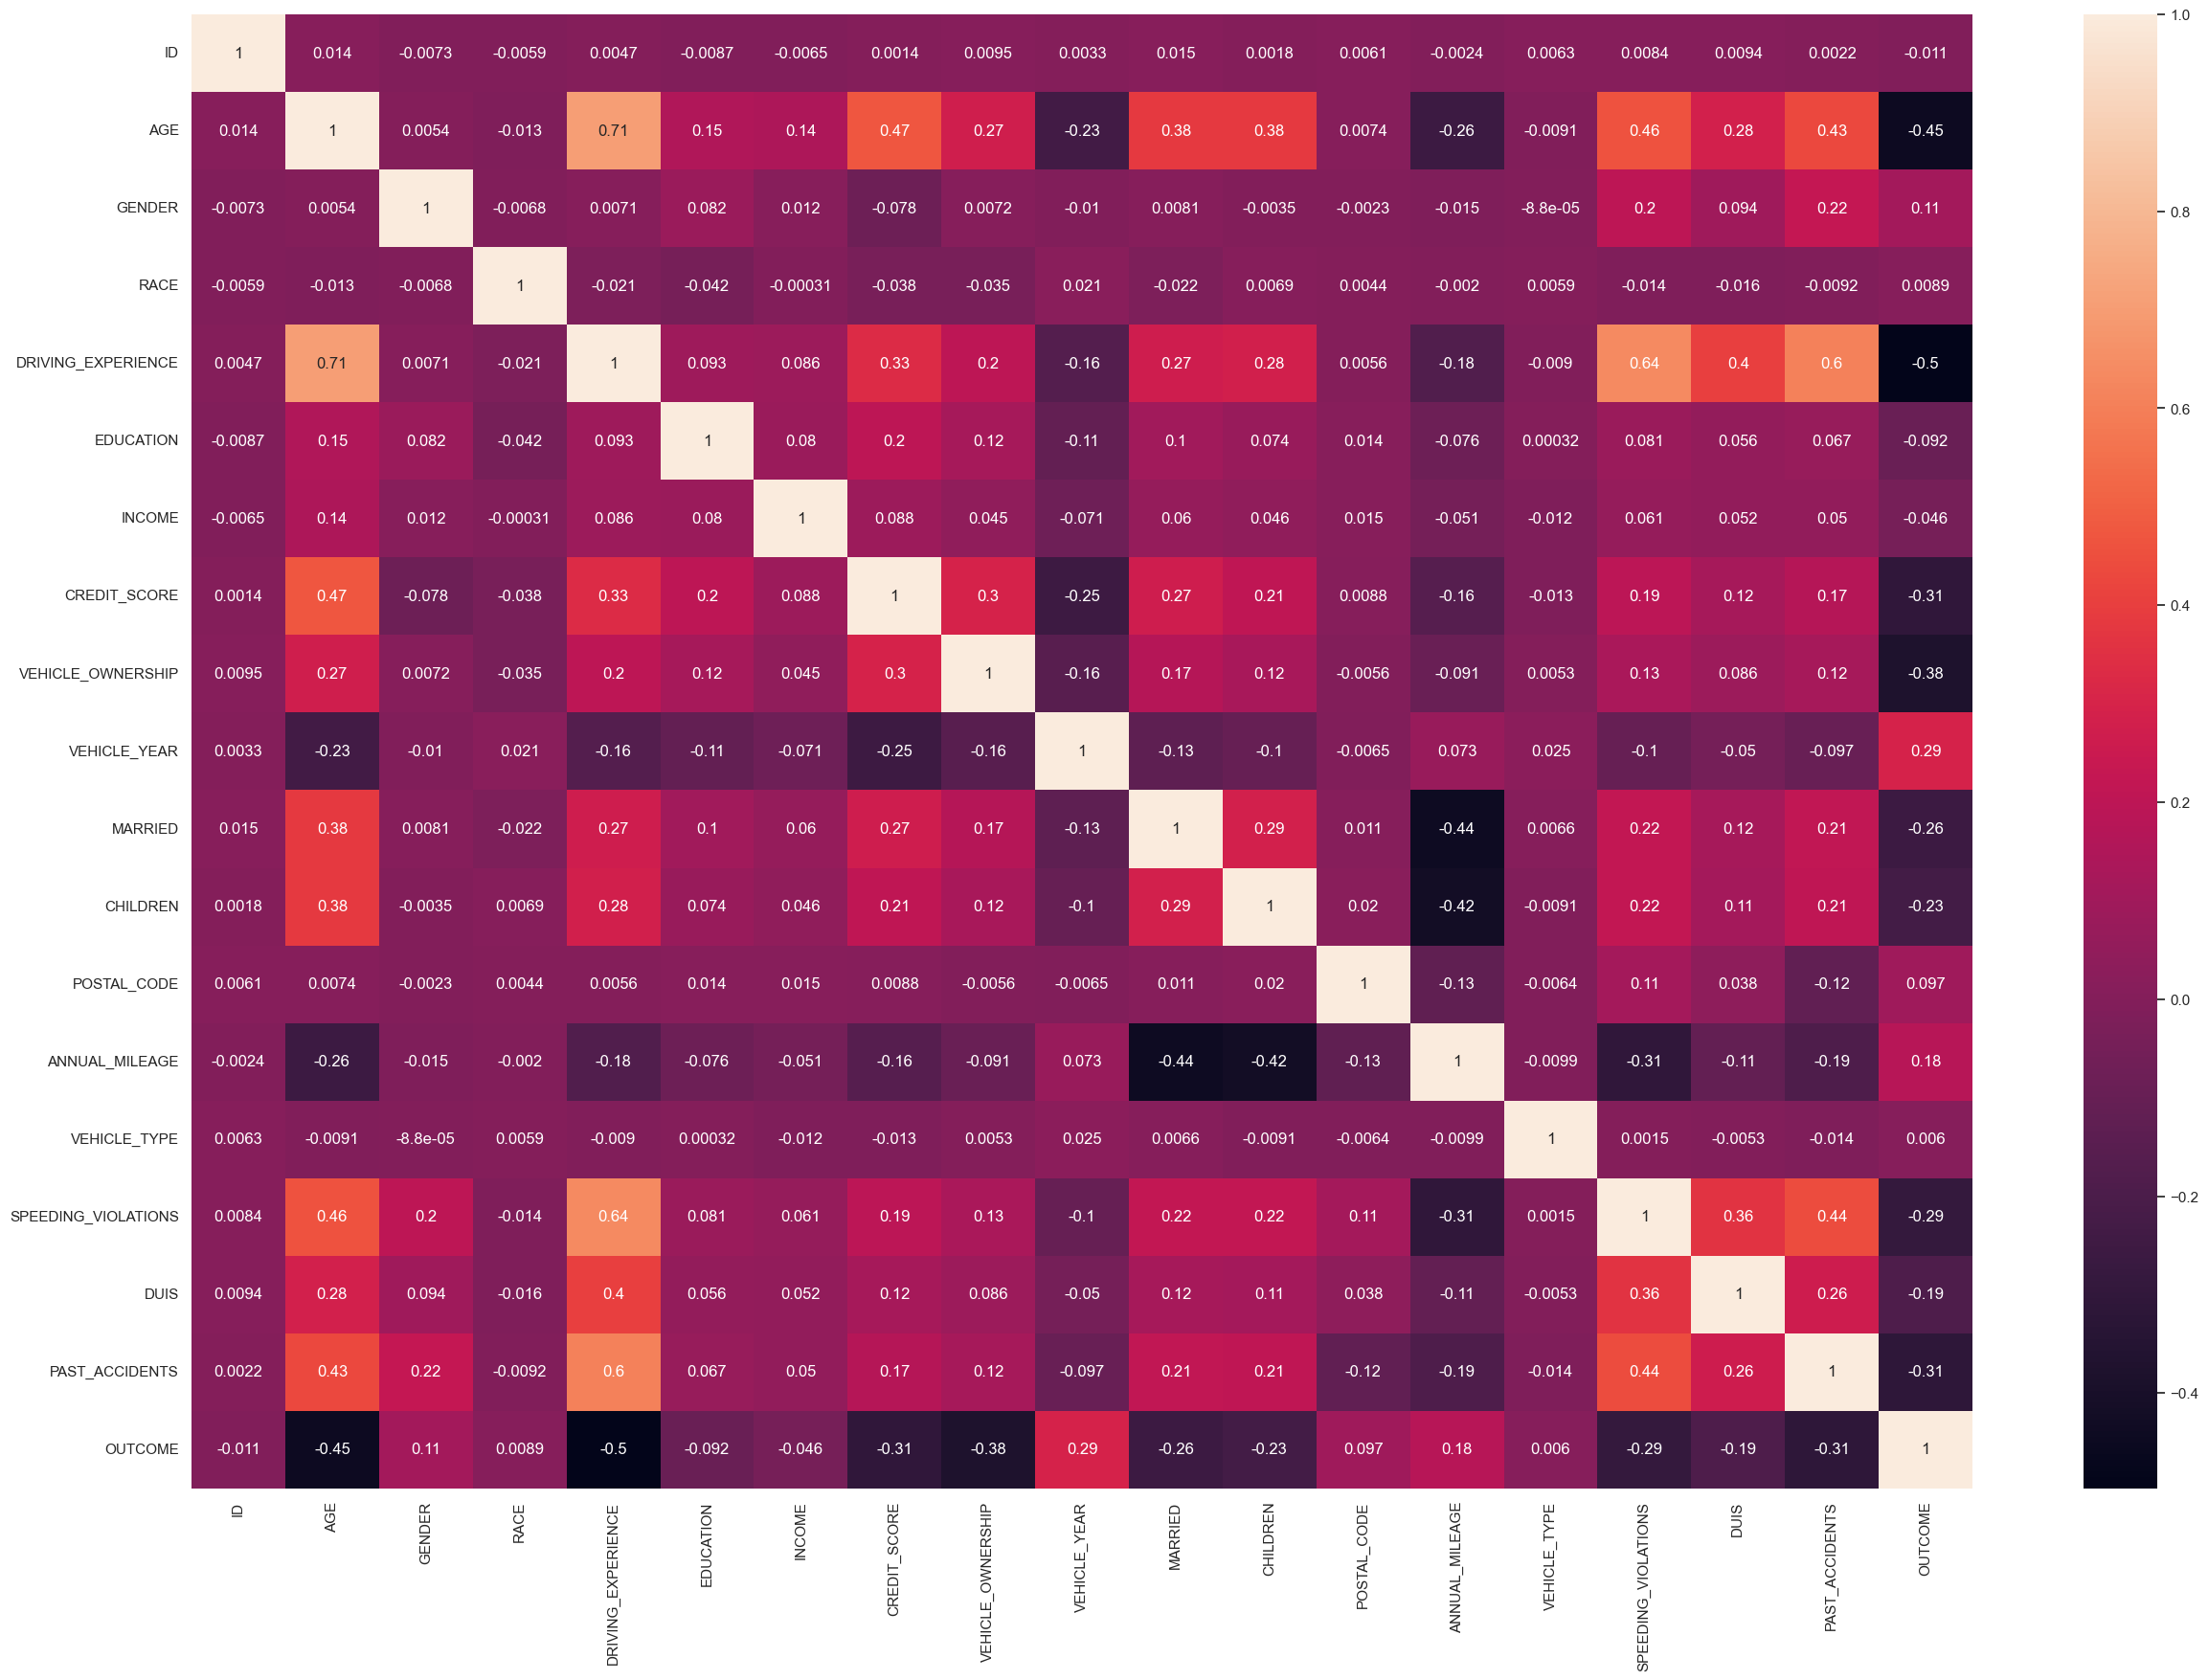

In [51]:
mask = np.zeros_like(data_final.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data_final.corr(), annot = True, cmap = 'rocket')

Исходя из визуализации корреляционной матрицы можем сказать, что :

1) Наиболее сильная корреляция 0.71 наблюдается между DRIVING_EXPERIENCE (стажем вождения) и AGE (возрастом), что вполне логично, ведь стаж вождения человека зависит от его возраста.

2) Между SPEEDING_VIOLATIONS (штрафами за превышение скорости) и DRIVING_EXPERIENCE (стажем вождения) корреляция составляет 0.64.

3) Также менее сильная корреляция наблюдается между PAST_ACCIDENTS (авариями) и DRIVING_EXPERIENCE (стажем вождения). Она составляет 0.6

Обработка выбросов.


In [52]:
data['PAST_ACCIDENTS'].describe()

count    9981.00000
mean        1.05811
std         1.65339
min         0.00000
25%         0.00000
50%         0.00000
75%         2.00000
max        15.00000
Name: PAST_ACCIDENTS, dtype: float64

In [53]:
data['SPEEDING_VIOLATIONS'].describe()

count    9981.000000
mean        1.485623
std         2.243208
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: SPEEDING_VIOLATIONS, dtype: float64

Построим для этих признаков соответствующие графики: boxplot и displot

Boxplot - это стандартизированный способ отображения набора данных на основе сводки из пяти чисел: минимума, максимума, медианы выборки и первого и третьего квартилей.

Displot -  гистограмма.


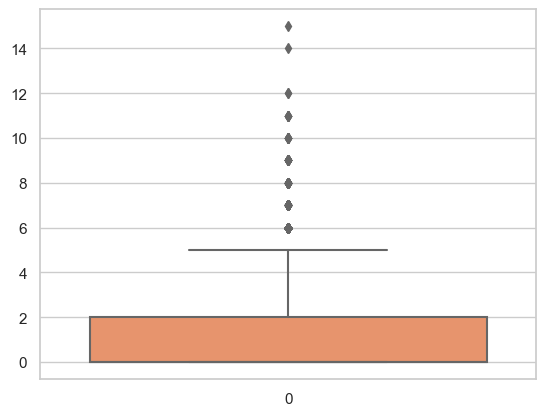

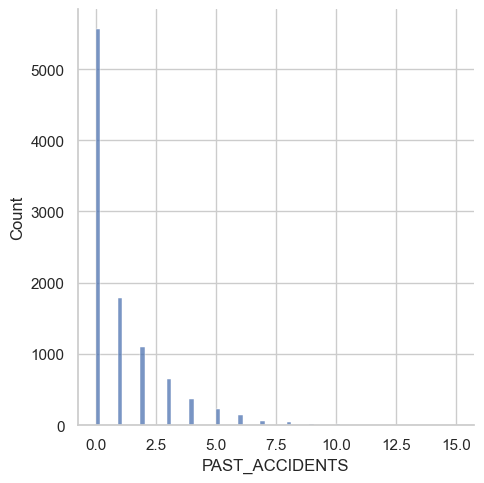

In [57]:
sns.boxplot(data_final['PAST_ACCIDENTS'], palette='OrRd')
sns.displot(data_final['PAST_ACCIDENTS'].dropna())

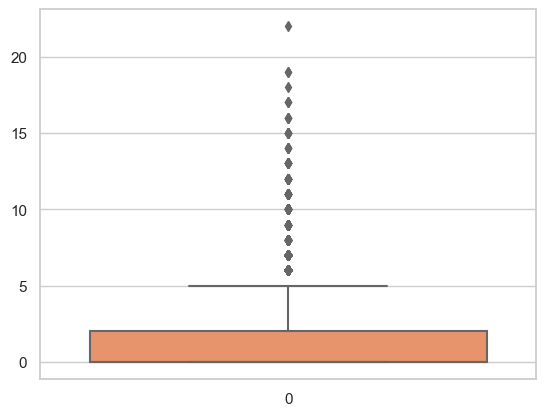

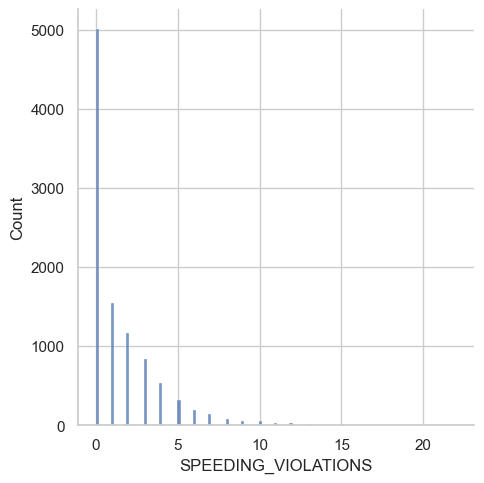

In [58]:
sns.boxplot(data_final['SPEEDING_VIOLATIONS'], palette='OrRd')
sns.displot(data_final['SPEEDING_VIOLATIONS'].dropna())

In [60]:
IQR = data_final['SPEEDING_VIOLATIONS'].quantile(0.75) - data_final['SPEEDING_VIOLATIONS'].quantile(0.25)
lower_bound = data_final['SPEEDING_VIOLATIONS'].quantile(0.25)-1.5*IQR
upper_bound = data_final['SPEEDING_VIOLATIONS'].quantile(0.75)+1.5*IQR

data_final = data_final[data_final['SPEEDING_VIOLATIONS'] <= upper_bound ]
data_final = data_final[data_final['SPEEDING_VIOLATIONS'] >= lower_bound ]




In [61]:
IQR = data_final['PAST_ACCIDENTS'].quantile(0.75) - data_final['PAST_ACCIDENTS'].quantile(0.25)
lower_bound = data_final['PAST_ACCIDENTS'].quantile(0.25)-1.5*IQR
upper_bound = data_final['PAST_ACCIDENTS'].quantile(0.75)+1.5*IQR

data_final = data_final[data_final['PAST_ACCIDENTS'] <= upper_bound ]
data_final = data_final[data_final['PAST_ACCIDENTS'] >= lower_bound ]

Нормализация данных:

С помощью линейного преобразования, приведем все значения к отрезку [0, 1]: 


In [62]:
data_normal = (data_final - data_final.min(axis=0)) / (data_final.max(axis=0) - data_final.min(axis=0))
data_normal.describe()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000,8135.000000
mean,0.499381,0.435566,0.445482,0.100061,0.274042,0.477259,0.512518,0.500351,0.677566,0.711985,0.454579,0.647941,0.123376,0.499748,0.048801,0.176103,0.056464,0.222987,0.367179
std,0.291044,0.331933,0.497050,0.300100,0.288370,0.444386,0.343868,0.146827,0.467437,0.452866,0.497963,0.477642,0.241266,0.132657,0.215466,0.263620,0.151695,0.349576,0.482065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247561,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.399405,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501321,0.333333,0.000000,0.000000,0.333333,0.500000,0.666667,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.752784,0.666667,1.000000,0.000000,0.333333,1.000000,0.666667,0.602482,1.000000,1.000000,1.000000,1.000000,0.275179,0.600000,0.000000,0.200000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиение данных на обучающую и тестовую выборки:

(Также удалим столбец 'ID' так как он не несет нам никакой полезной информации ) 

In [83]:
from sklearn.model_selection import train_test_split

X = data_normal.drop(['OUTCOME','ID'], axis = 1)
y = data_normal['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрим на обучающую выборку:

In [84]:
X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
6976,1.000000,1.0,0.0,0.333333,0.0,0.666667,0.675227,0.0,0.0,0.0,1.0,0.000000,0.50,0.0,0.0,0.333333,0.0
2992,0.666667,0.0,0.0,0.666667,1.0,0.666667,0.541586,1.0,0.0,0.0,1.0,0.275179,0.50,0.0,0.6,0.333333,0.5
5512,0.666667,0.0,0.0,0.666667,0.0,0.000000,0.619319,1.0,0.0,0.0,0.0,0.134114,0.75,0.0,0.0,0.000000,0.0
5736,1.000000,1.0,0.0,0.000000,1.0,0.666667,0.650688,1.0,0.0,1.0,1.0,0.000000,0.45,0.0,0.0,0.000000,0.0
9570,0.333333,0.0,0.0,0.333333,0.5,0.333333,0.321954,0.0,1.0,0.0,0.0,0.000000,0.85,0.0,0.0,0.000000,0.0


Воспользуемся GridSearchCV для перебота параметров. 

GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. 

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

def cv_params(model, param_grid):
    scoring = 'neg_mean_absolute_error' 
    opt_params = GridSearchCV(
      estimator = model, # модель
      param_grid = param_grid, # параметры
      scoring = scoring, # стратегия валидаци
      cv = 5,#количество слоев кросс - валидации
      #verbose = 10 
      n_jobs = -1 ) #количество потоков для обучения , -1 = все
    opt_params.fit(X_train,y_train) #учимся на оптимальных параметрах
    params = opt_params.best_params_ #лучшие параметры
    best_score = opt_params.best_score_ #лучший результат

    print(f'Best score:{round(-best_score,2)}')
    print(f'Best parameters:{params}\n')

    return params
  

Теперь нам нужно:

    1)Создать словарь, в который впишем параметры, которые будем прогонять GridSearch’ем.
    
    2)Объявить классификатор, не внося в него никаких параметров.
    
    3)Получить лучшие параметры для данного классификатора по сетке, которую мы задали. 
    
Так мы делаем для каждого классификатора, который мы используем.

**KNeighborsClassifier**

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': np.arange(1,50), #кол-во соседей
    'metric': ['manhattan', 'euclidean'], #метрика, используемая для вычисления расстояния.
    'weights': ['uniform', 'distance'] #весовая функция, используемая при прогнозировании
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean, knn_param_grid)


Best score:0.19
Best parameters:{'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}



Обучаем наш классификатор с наилучшими параметрами, надейнными по сетке.

In [87]:
import time
#knn
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.18341255531880019
Ошибка на тесте  = 0.19174041297935104
Время работы = 0.0019948482513427734


Построим ConfusionMatrix:

(Матрица ошибок – это метрика производительности классифицирующей модели Машинного обучения (ML) )



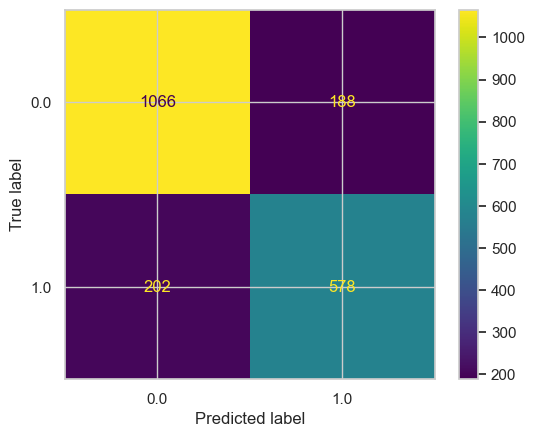

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

In [89]:
print(f'Точность на тестовой выборке {accuracy_score(y_test,pred_knn)}')
print(f'Точность на тренировочной выборке {accuracy_score(y_train,pred_knn_train)}')


Точность на тестовой выборке 0.8082595870206489
Точность на тренировочной выборке 0.8165874446811998


Посмотрим также на график, который будет демонстрировать нам значение точности предсказаний в зависимости от количества ближайших соседей:

In [90]:

accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='uniform')
    KNN.fit(X_train, y_train)
    
    accuracy_train = round(KNN.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(KNN.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Text(0, 0.5, 'Accuracy, %')

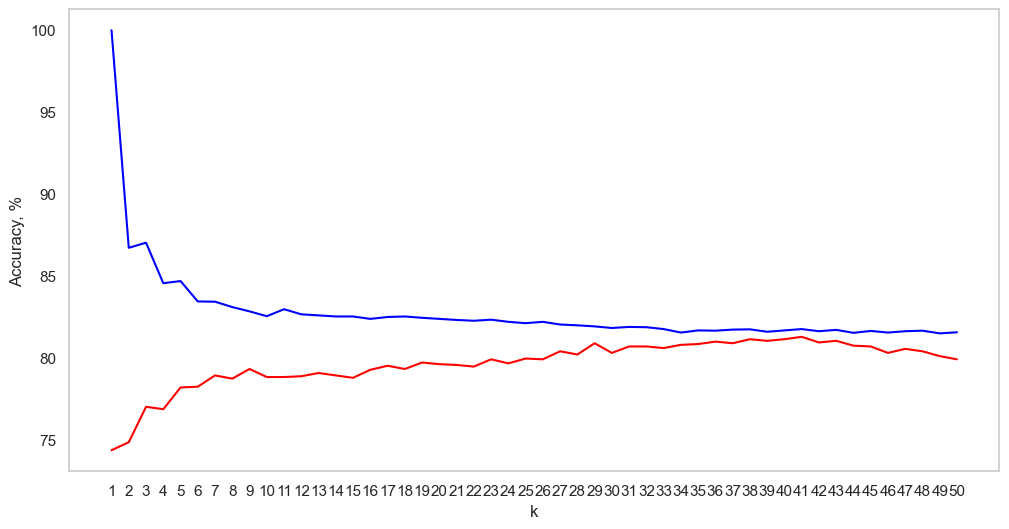

In [91]:
k = np.arange(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_train, 'blue')
plt.plot(k, accuracy_list_test, 'red')
plt.xlabel('k')
plt.xticks(np.arange(min(k), max(k)+1, 1))
plt.grid(which='major')
plt.ylabel('Accuracy, %')

Найдем значение k, при котором достигается максимальная точность на тестовой выборке:

In [92]:
for i in range(0,50):
    if accuracy_list_test[i] == np.max(accuracy_list_test):
        print(f'Количество соседей: {i+1} , дастигаемая точность: {accuracy_list_test[i]}')

Количество соседей: 41 , дастигаемая точность: 81.2684


Обучим наш классификатор с соответствующим значением кол-ва соседей, максимизирующем точность на тестовой выборке.

In [93]:
knn = KNeighborsClassifier(n_neighbors=41,metric='manhattan',weights='uniform')
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.1825930175381085
Ошибка на тесте  = 0.1873156342182891
Время работы = 0.0029921531677246094


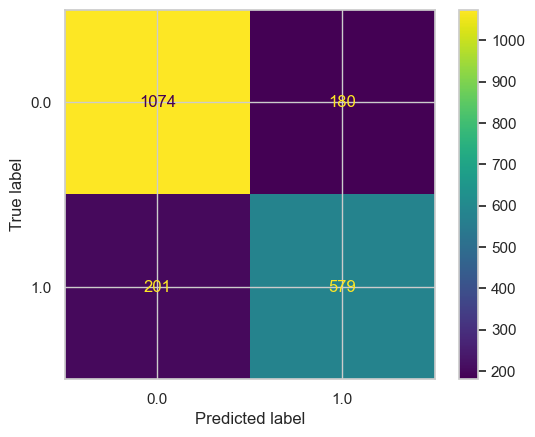

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

In [95]:
print(f'Точность на тестовой выборке {accuracy_score(y_test,pred_knn)}')
print(f'Точность на тренировочной выборке {accuracy_score(y_train,pred_knn_train)}')

Точность на тестовой выборке 0.8126843657817109
Точность на тренировочной выборке 0.8174069824618915


Таким образом, наилучший результат для метода ближайших соседей :

    Кол - во соседей 41
    Точность на тестовой выборке 81.2684
    Точность на тренировочной выборке 81.7406

**RandomForest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth': [3,5,7,10,15], #глубина дерева
    'n_estimators':[100,200,300,400] #кол-во деревьев в десу
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.18
Best parameters:{'max_depth': 10, 'n_estimators': 400}



In [97]:
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.10653991148991969
Ошибка на тесте  = 0.17748279252704033
Время работы = 0.000997781753540039


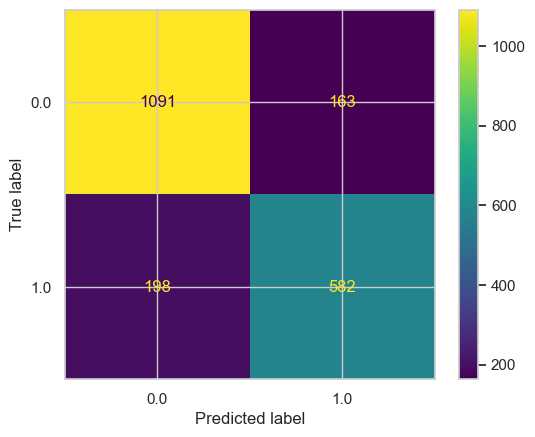

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf)

In [99]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_rf)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_rf_train)*100,4)}')

Точность на тестовой выборке 82.2517
Точность на тренировочной выборке 89.346


Посмотрим также на график, который будет демонстрировать нам значение точности от максимальной глубины дерева :

In [100]:

from sklearn.ensemble import RandomForestClassifier
accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 15, 1):
    rf = RandomForestClassifier(max_depth=i,  n_estimators=400)
    rf.fit(X_train, y_train)
    
    accuracy_train = round(rf.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(rf.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Text(0, 0.5, 'Accuracy, %')

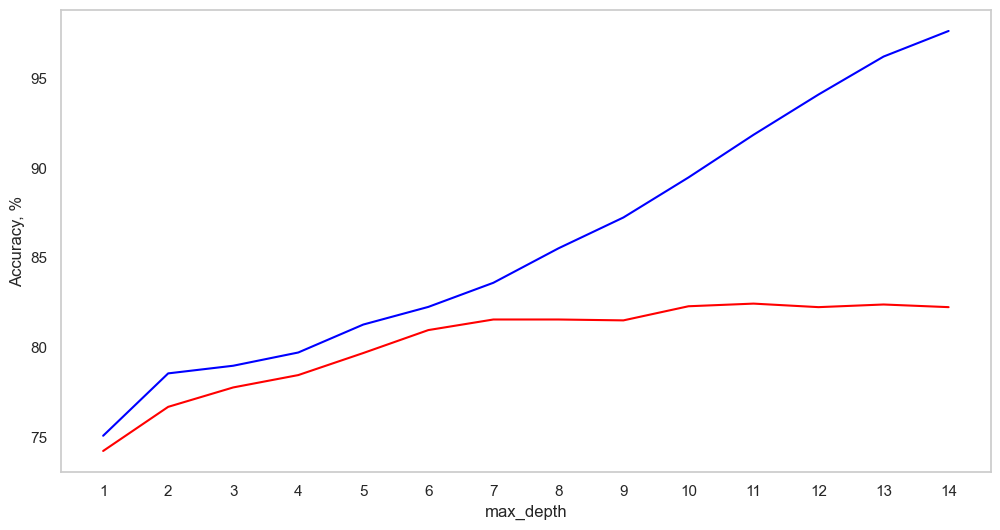

In [101]:
i = np.arange(1, 15, 1)
plt.figure(figsize=(12, 6))
plt.plot(i, accuracy_list_train, 'blue')
plt.plot(i, accuracy_list_test, 'red')
plt.xlabel('max_depth')
plt.xticks(np.arange(min(i), max(i)+1, 1))
plt.grid(which='major')
plt.ylabel('Accuracy, %')

Обучим наш классификатор с соответствующими значениями кол-ва деревьев в лесу и глубиной дерева:

In [102]:
rf = RandomForestClassifier(max_depth=10,  n_estimators=400)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time


print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.10588428126536634
Ошибка на тесте  = 0.1750245821042281
Время работы = 0.0009970664978027344


In [103]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_rf)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_rf_train)*100,4)}')

Точность на тестовой выборке 82.4975
Точность на тренировочной выборке 89.4116


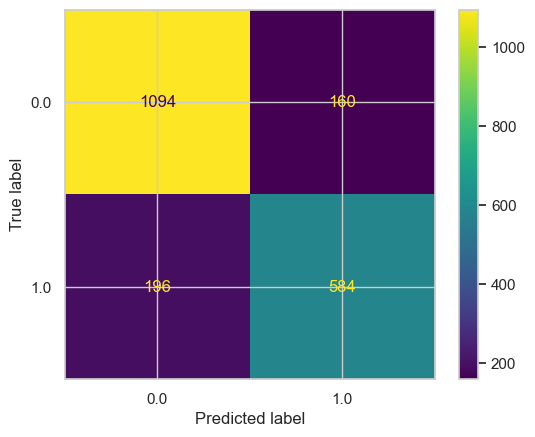

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf)

Таким образом, наилучший результат для Случайного леса :

    Кол - во деревьев в лесу 400
    Глубина дерева 10
    Точность на тестовой выборке 82.2517
    Точность на тренировочной выборке 89.346
    

**LogisticRegression**

In [105]:
from sklearn.linear_model import LogisticRegression
logreg_param_grid = {
    'solver': ['lbfgs'],
    'random_state':[0,1,2],
    'max_iter':[200,300,400],

}
logreg_clean = LogisticRegression()
logreg_params = cv_params(logreg_clean, logreg_param_grid)

Best score:0.18
Best parameters:{'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}



In [106]:
logr = LogisticRegression(**logreg_params)
logr.fit(X_train,y_train)
start_time = time.time()
pred_logr = logr.predict(X_test)
pred_logr_train = logr.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_logr_train)
error_test  = np.mean(y_test  != pred_logr)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.18095394197672512
Ошибка на тесте  = 0.1735496558505408
Время работы = 0.0019953250885009766


In [107]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_logr)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_logr_train)*100,4)}')


Точность на тестовой выборке 82.645
Точность на тренировочной выборке 81.9046


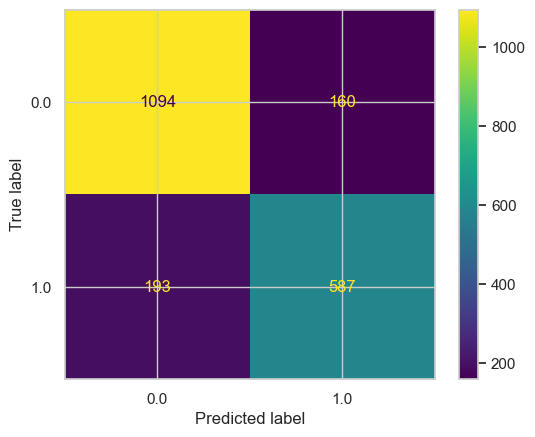

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_logr)

**MLPClassifier**

Неглубокая нейронная сеть ( 1 скрытый слой - 100 нейронов ) 

In [116]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'relu',max_iter=1000,
                          random_state = 42)
mlp.fit(X_train,y_train)
start_time = time.time()
pred_mlp = mlp.predict(X_test)
pred_mlp_train = mlp.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_mlp_train)
error_test  = np.mean(y_test  != pred_mlp)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.13653499426323554
Ошибка на тесте  = 0.1912487708947886
Время работы = 0.000997781753540039


In [117]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_mlp)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_mlp_train)*100,4)}')

Точность на тестовой выборке 80.8751
Точность на тренировочной выборке 86.3465


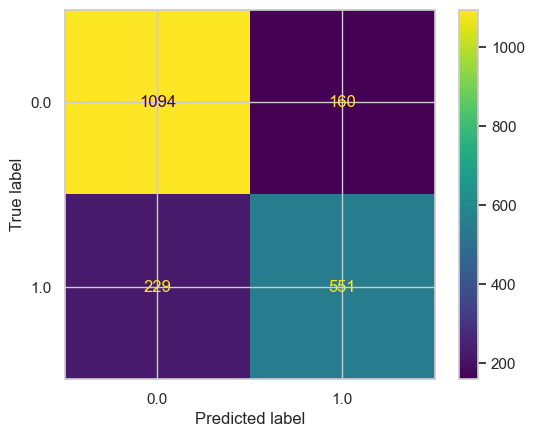

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_mlp)

Построим график зависимости ошибки от параметра альфа:

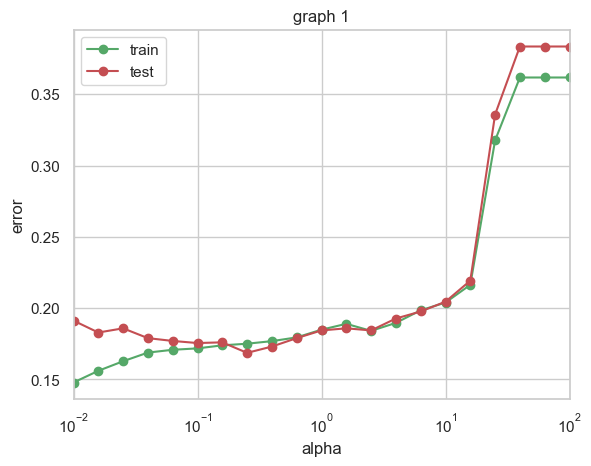

In [119]:
alpha_list = np.logspace(-2, 2, 21)

train_error = []
test_error = []

for alpha in alpha_list:
    mlp = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp.fit(X_train, y_train)

    y_train_mlp = mlp.predict(X_train)
    y_test_mlp = mlp.predict(X_test)
    
    train_error.append(np.mean(y_train != y_train_mlp))
    test_error.append(np.mean(y_test != y_test_mlp))
    
plt.semilogx(alpha_list, train_error, 'g-o', label = 'train')
plt.semilogx(alpha_list, test_error, 'r-o', label = 'test')
plt.xlim([np.min(alpha_list), np.max(alpha_list)])
plt.title('graph 1')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [122]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print('Минимальная ошибка на трейне = ', min_train_err)
print('Минимальная ошибка на тесте = ', min_test_err)

Минимальная ошибка на трейне =  0.14784461563678086
Минимальная ошибка на тесте =  0.16863323500491642


Оптимальный параметр альфа:

In [124]:
alpha_opt = alpha_list[test_error == min_test_err]
print('Оптимальный параметр альфа = ', alpha_opt)

Оптимальный параметр альфа =  [0.25118864]


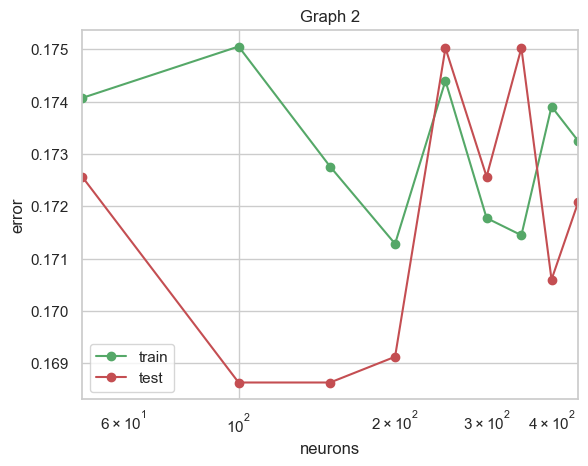

In [125]:
n_list = np.array([i for i in range(50, 500, 50)])

train_error = []
test_error = []

for neurons in n_list:
    mlp = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (neurons,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
 
    train_error.append(np.mean(y_train != y_train_pred))
    test_error.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(n_list, train_error, 'g-o', label = 'train')
plt.semilogx(n_list, test_error, 'r-o', label = 'test')
plt.xlim([np.min(n_list), np.max(n_list)])
plt.title('Graph 2')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()   

In [126]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print('Минимальная ошибка на трейне = ', min_train_err)
print('Минимальная ошибка на тесте = ', min_test_err)

Минимальная ошибка на трейне =  0.17128339616456317
Минимальная ошибка на тесте =  0.16863323500491642


Оптимальное количество нейронов:

In [127]:
neurons_num_opt = n_list[test_error == min_test_err]
print('Оптимальное количество нейронов = ', neurons_num_opt)

Оптимальное количество нейронов =  [100 150]


А теперь применим найденные оптимальные значения параметров и посмотрим на качество:

In [128]:
mlp = MLPClassifier(alpha=0.25118864, hidden_layer_sizes = (150,),
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
mlp.fit(X_train,y_train)
start_time = time.time()
pred_mlp = mlp.predict(X_test)
pred_mlp_train = mlp.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_mlp_train)
error_test  = np.mean(y_test  != pred_mlp)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.17275856416980823
Ошибка на тесте  = 0.16863323500491642
Время работы = 0.0009968280792236328


In [129]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_mlp)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_mlp_train)*100,4)}')

Точность на тестовой выборке 83.1367
Точность на тренировочной выборке 82.7241


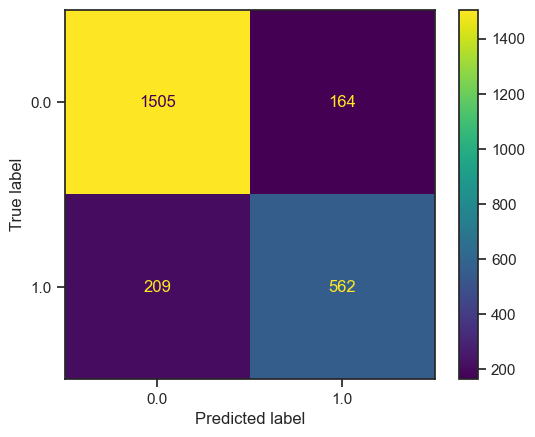

In [150]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_mlp)

Выводы:
    
В данной лабораторной работе рассматривалась задача классификации автострахования ( одобрять ли клиенту страховку или нет ).
Объем данных, с которыми мы работали:  10000  объектов, 19  признаков, 2 класса ( 1 и 0 ). Признаки имели как числовой тип так и тип object, который мы переобозначили в категориальный тип. В данных оказалось около 2 % пропущенных значений, которые были успешно заполнены медианами по соответствующим признакам. Визуализировав данные мы выявили некоторые закономерности, которые были описаны под соответствующими графиками.Также мы избавили от дубликатов, выбросов. Перевели категориальные признаки в числовые, нормализовали наши данные.

Алгоритмы, которые мы использовали:

    1) Метод k-ближайших соседей
    
    2) Случайный лес
    
    3) Логистическая регрессия
    
    4) Неглубокая нейронная сеть ( 1 слой )
    
    Перебор параметров осуществлялся с помощью поиска по сетке GridSearch. 
    
    - KNeighborsClassifier

    Точность на тестовой выборке 81.2684
    
    Точность на тренировочной выборке 81.7406
    
    - RandomForestClassifier
    
    Точность на тестовой выборке 82.4975
    
    Точность на тренировочной выборке 89.4116
    
    - LogisticRegression
    
    Точность на тестовой выборке 82.645
    
    Точность на тренировочной выборке 81.9046
   
    - MLPClassifier
    
    Точность на тестовой выборке 83.1367
    
    Точность на тренировочной выборке 82.7241

Исходя из результатов в данном эксперименте лучше всего себя показала неглубокая нейронная сеть с одним слоем и 150 нейронами, ведь 
данный алгоритм достиг точности 83.1367 % на тестовой выборке.